In [4]:
import importlib
import numpy as np
import sys
sys.path.append('../')

import Parallel_Run
importlib.reload(Parallel_Run)

import matplotlib.pyplot as plt

media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/time_equilibration_Nlinker/"

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)
import cProfile
import re
from Data_Treatement import *
def sliding_average(X, Y, window_size=5):
    """
    Apply a sliding average (moving average) to the curve defined by (X, Y).
    
    Parameters:
    - X: numpy array of x-values.
    - Y: numpy array of y-values, must be the same length as X.
    - window_size: size of the sliding window (number of points to average).
    
    Returns:
    - X_smooth: X values corresponding to the center of each sliding window.
    - Y_smooth: Smoothed Y values.
    """
    half_window = window_size // 2
    
    # Initialize smoothed Y array
    Y_smooth = np.convolve(Y, np.ones(window_size)/window_size, mode='valid')
    
    # Adjust X to match the size of the smoothed Y array
    # This centers the window on the point being averaged
    start_index = (window_size - 1) // 2
    end_index = start_index + len(Y_smooth)
    X_smooth = X[start_index:end_index]
    
    return X_smooth, Y_smooth

In [5]:
# gillespie parameter
Nlinker = 2
ell_tot = 10**3
kdiff = 0.1
Energy = -15

Nprocess = 1000
seeds = set()
while len(seeds) < Nprocess:
    seeds.add(np.random.randint(1000000))
seeds = list(seeds)
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]

# argument of the different classes
cluster_arg = tuple([3.]) # max distance
MSD_arg = () # no argument 
ISF_arg = (0.5,10) # q_norm, q_num_sample
NRG_arg = ()
PCF_arg = (np.sqrt(ell_tot)/2,50) # max_distance,numb_bin
PCF_L_arg = (ell_tot,30) # max_distance,numb_bin

# Simulation parameters
step_tot = 2*10**4
#check_steps = 10**2
initial_check_steps = step_tot
coarse_grained_step = 10**1
log_base=False

In [3]:
check_points = [int(round(initial_check_steps/coarse_grained_step*i) * coarse_grained_step) for i in range(step_tot//initial_check_steps)]
if check_points[-1] != step_tot:
    check_points[-1] = step_tot
check_points = list(set(check_points))
check_points.sort()
print(check_points)

[20000]


In [3]:
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N2.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [4]:
from Reader import *
file = CustomHDF5Reader(media+'N2.hdf')
file.open()
print(len(file.list_groups()))
file.close()

100


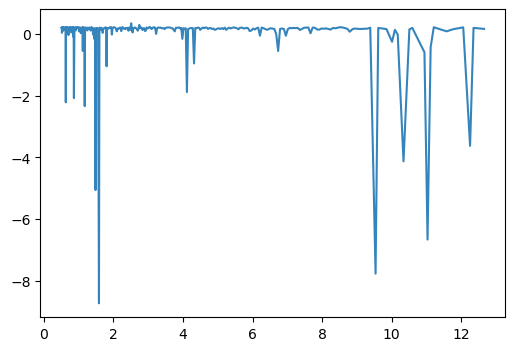

In [5]:
NRG_2 = Data_Treatement(media+'N2.hdf',data_type='NRG')
NRG_2.average(num_bins=step_tot//50,log_scale=True)
plt.figure(figsize=(6,4))
plt.plot(NRG_2.binned_time/2,NRG_2.average_data - np.mean(NRG_2.average_data),label='N =2',alpha=0.9)

In [27]:
Nlinker = 3
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N3.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [28]:
Nlinker = 4
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N4.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [6]:
Nlinker = 5
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N5_new.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [52]:
Nlinker = 6
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N6.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [53]:
Nlinker = 7
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N7.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [54]:
Nlinker = 8
#step_tot = 2*step_tot
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N8.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [32]:
Nlinker = 15
ell_tot = 10**4
step_tot = 1*10**5
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N15_L10E4.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [3]:
Nlinker = 20
ell_tot = 10**4
step_tot = 1*10**5
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N20_L10E4.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [4]:
Nlinker = 50
step_tot = 5*10**5
args = [[ell_tot,Energy,kdiff,seeds[_],Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'N50.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [12]:
from Reader import *
file = CustomHDF5Reader(media+'N5.hdf')
file.open()
print(len(file.list_groups()))
file.close()

1000


In [7]:
NRG_5 = Data_Treatement(media+'N5.hdf',data_type='NRG')
NEW_5 = Data_Treatement(media+'N5_new.hdf',data_type='NRG')

In [8]:
NRG_5.average(num_bins=step_tot//50,log_scale=True)
NEW_5.average(num_bins=step_tot//50,log_scale=True)

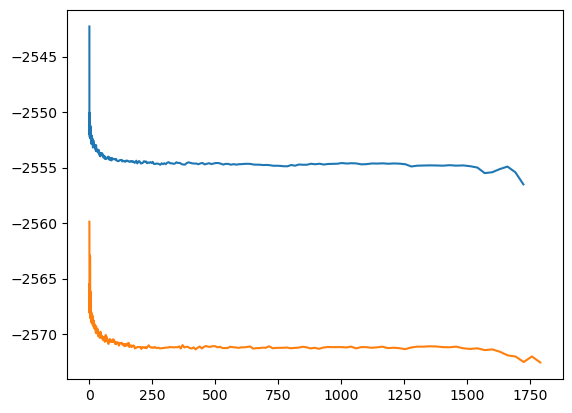

In [9]:
plt.plot(NRG_5.binned_time,NRG_5.average_data)
plt.plot(NEW_5.binned_time,NEW_5.average_data)

In [1]:
NRG_2 = Data_Treatement(media+'N2.hdf',data_type='NRG')
#NRG_3 = Data_Treatement(media+'N3.hdf',data_type='NRG')
#NRG_4 = Data_Treatement(media+'N4.hdf',data_type='NRG')
NRG_5 = Data_Treatement(media+'N5.hdf',data_type='NRG')
NRG_6 = Data_Treatement(media+'N6.hdf',data_type='NRG')
#NRG_7 = Data_Treatement(media+'N7.hdf',data_type='NRG')
#NRG_8 = Data_Treatement(media+'N8.hdf',data_type='NRG')
NRG_15LE4 = Data_Treatement(media+'N15_L10E4.hdf',data_type='NRG')

NRG_20 = Data_Treatement(media+'N20.hdf',data_type='NRG')
NRG_50 = Data_Treatement(media+'N50.hdf',data_type='NRG')

NameError: name 'Data_Treatement' is not defined

In [10]:
NRG_2.average(num_bins=step_tot//50,log_scale=True)
#NRG_3.average(num_bins=step_tot//50,log_scale=True)
#NRG_4.average(num_bins=step_tot//50,log_scale=True)
#NRG_5.average(num_bins=step_tot//50,log_scale=True)
NRG_6.average(num_bins=step_tot//50,log_scale=True)
#NRG_7.average(num_bins=step_tot//50,log_scale=True)
#NRG_8.average(num_bins=step_tot//50,log_scale=True)
NRG_15LE4.average(num_bins=step_tot//50,log_scale=True)
NRG_20.average(num_bins=step_tot//50,log_scale=True)
NRG_50.average(num_bins=step_tot//50,log_scale=True)

In [11]:
#NRGS = [NRG_2,NRG_3,NRG_4,NRG_5,NRG_6,NRG_7,NRG_8,NRG_20,NRG_50]
NRGS = [NRG_2,NRG_6,NRG_15LE4,NRG_20,NRG_50]

In [8]:
L = 10**3
Nint = 10**3
Rmax = 10**3
S = lambda r,l : 3/2*np.log(3/(2*np.pi*l))-3/2*r**2/l+L*np.log(4*np.pi)
p = lambda r,l : (3/(2*np.pi*l))**(3/2)*np.exp(-3*r**2/(2*l))*1/L
int_L = lambda r : np.sum(np.array([(L)/Nint * p(r,i*(L)/Nint) * S(r,i*(L)/Nint) for i in range(1,Nint+1)]))
#int_L = lambda r : np.sum(np.array([(L)/Nint * p(r,i*(L)/Nint)  for i in range(1,Nint+1)]))
int_r = lambda N :  -(np.sum(np.array([int_L(i*(Rmax)/Nint)*4*np.pi*(i*(Rmax)/Nint)**2 * (Rmax)/Nint for i in range(1,Nint+1)])) + 15)

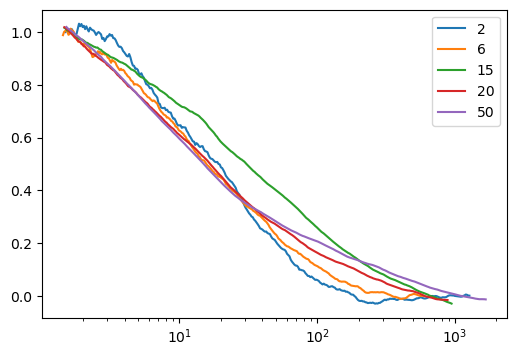

In [15]:
plt.figure(figsize=(6,4))
#plt.plot(NRG_2.binned_time/2,NRG_2.average_data - np.mean(NRG_2.average_data),label='N =2',alpha=0.9)
#plt.plot(NRG_3.binned_time/3,NRG_3.average_data- np.mean(NRG_3.average_data),label='N =3',alpha=0.7)
#plt.plot(NRG_4.binned_time/4,NRG_4.average_data- np.mean(NRG_4.average_data),label='N =4',alpha=0.5)
for NRG in NRGS:#[NRGS[0],NRGS[4],NRGS[-2],NRGS[-1]]:
    X,Y  = NRG.binned_time,NRG.average_data
    X,Y = X[:-40],Y[:-40]
    X,Y = X[10:],Y[10:]
    X,Y = sliding_average(X,Y,window_size=20)
    
    Y = (Y - np.mean(Y[-len(Y)//10:]))/(np.mean(Y[:10])- np.mean(Y[-len(Y)//10:]))
    #Y = (Y-min(Y))/(max(Y)-min(Y))
    plt.plot(X,Y,label = NRG.attributes['Nlinker'])
#plt.plot(NRG_2.binned_time,[-2534.5 for _ in range(NRG_2.binned_time.shape[0])])
#plt.xscale('log')
#plt.ylim(-2535,-2532.5)
#plt.ylim(-1,2)
#plt.xlim(10**0,1000)
#plt.ylim(0,1.5)
plt.xscale('log')
#plt.yscale('log')
plt.legend()

(381,)

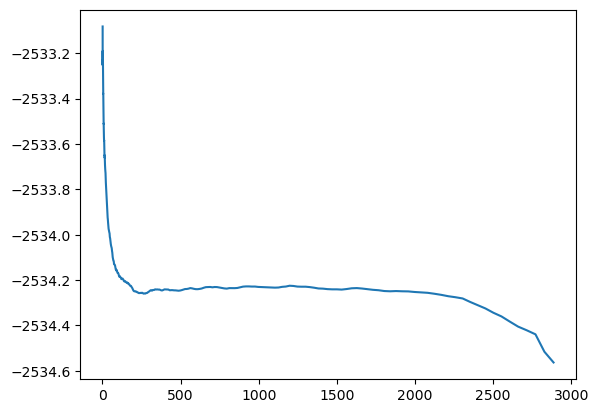

In [17]:
#NRG_15LE4.average(num_bins=step_tot//50,log_scale=True)
X,Y = sliding_average(NRGS[0].binned_time,NRGS[0].average_data,window_size=20)
#X,Y = NRGS[0].binned_time,NRGS[0].average_data
plt.plot(X,Y)
Y.shape